<a href="https://colab.research.google.com/github/ogut77/DataScience/blob/main/Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/ogut77/DataScience/main/data/kaggle_sales.csv')
df = df[(df['store'] == 1) & (df['item'] == 1)] # item 1 in store 1
df = df.set_index('date')
y = pd.DataFrame(df['sales'])
y_to_train = y[:-365]
y_to_test = y[-365:] # last year for testing

Text(0.5, 1.0, 'Train, Test and Predicted Test using Holt Winters')

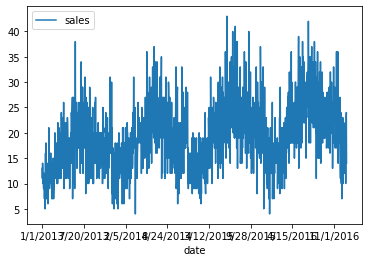

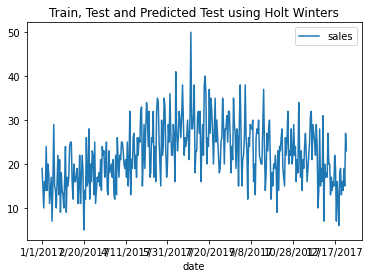

In [27]:
from matplotlib import pyplot as plt
y_to_train.plot(legend=True,label='TRAIN')
y_to_test.plot(legend=True,label='TEST',figsize=(6,4))
plt.title('Train, Test and Predicted Test using Holt Winters')

In [29]:
!pip install tbats

     |████████████████████████████████| 43 kB 1.7 MB/s 
     |████████████████████████████████| 1.4 MB 10.0 MB/s 
     |████████████████████████████████| 9.8 MB 30.5 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [30]:
from tbats import TBATS, BATS# Fit the model
estimator = TBATS(seasonal_periods=(7, 365.25))
model = estimator.fit(y_to_train)# Forecast 365 days ahead
y_forecast = model.forecast(steps=365)